# <span style="color:darkblue"> Lecture 25 - Advanced Plots 1  </span>

<font size = "5">

In this lecture we will work on the aesthetics of graphs

- Work with subplots
- Change different aspects of the layout

# <span style="color:darkblue"> I. Setup working environment  </span>

<font size = "5">

Import libraries

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
from   matplotlib import style
from   matplotlib import ticker
import matplotlib.dates as mdates

<font size = "5">
Import data and parse columns

In [2]:
portfolios         = pd.read_csv("data_raw/portfolios.csv")
portfolios["date"] = pd.to_datetime(portfolios["date_str"])

# <span style="color:darkblue"> II. Subplots  </span>

<font size = "5">

Subplot size


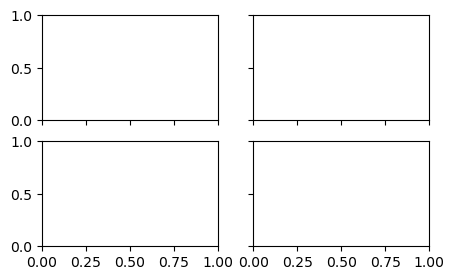

In [10]:

# Create an empty layout with 1 row x 1 column
# "figsize" takes a  list with the width and height

fig, ax = plt.subplots(2,2,figsize = [5,3], sharey = True, sharex = True)

<font size = "5">

Subplots + Lines

Text(0.5, 1.0, 'DJones')

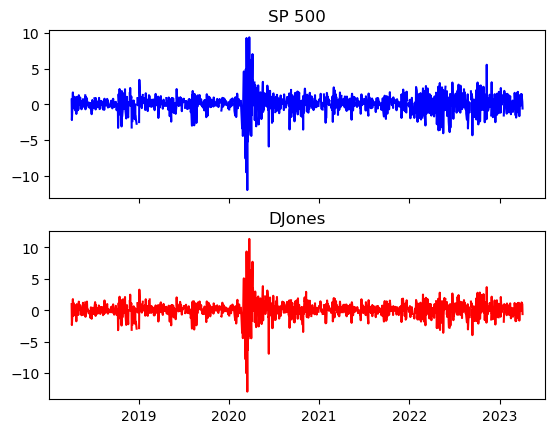

In [25]:
fig, ax = plt.subplots(2, 1, sharex = True)
ax[0].plot(plot_data["growth_sp500"], color = "blue")
ax[0].set_title("SP 500")
ax[1].plot(plot_data["growth_djia"], color = "red")
ax[1].set_title("DJones")

Text(0.5, 1.0, 'Portfolio performance over time')

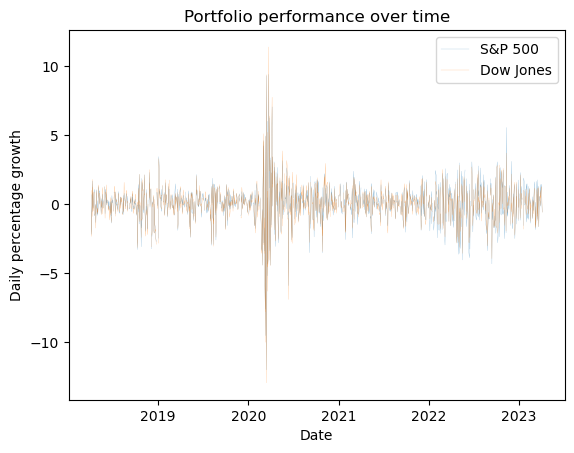

In [14]:
# Extract information that we want to plot
# Indicate that "date" is the x-axis
plot_data = portfolios[["date","growth_sp500","growth_djia"]].set_index("date")

# Generate basic lineplot 
# We add with the subplot environment and add more info
# The linewidth option controls how thin the lines are
# With subplots we use "set_xlabel" rather than "xlabel"
fig, ax = plt.subplots(1,1)
ax.plot(plot_data,
        linewidth=.1)
ax.legend(["S&P 500","Dow Jones"])
ax.set_ylabel("Daily percentage growth")
ax.set_xlabel("Date")
ax.set_title("Portfolio performance over time")


<font size = "5">

Subplots + Histograms

In [33]:
# Baseline plot
fig, ax = plt.subplots(1,1)
ax.hist(x = portfolios["growth_sp500"])
ax.legend(["S&P 500","Dow Jones"])
ax.set_ylabel("Frequency")
ax.set_xlabel("Daily percentage growth")
ax.set_title("Histogram of portfolio growth")


TypeError: cannot unpack non-iterable Axes object

<font size = "5">

Try it yourself!

- Create a scatter plot of "growth_sp500" (y-axis) and <br>
"growth_djia" (x-axis) using ```.subplots()```
- Label the axes and the title.

HINT: Write ``` ax.scatter(x = ..., y = ...) ```


Text(0.5, 1.0, 'Growth of SP 500 vs Growth of DJones')

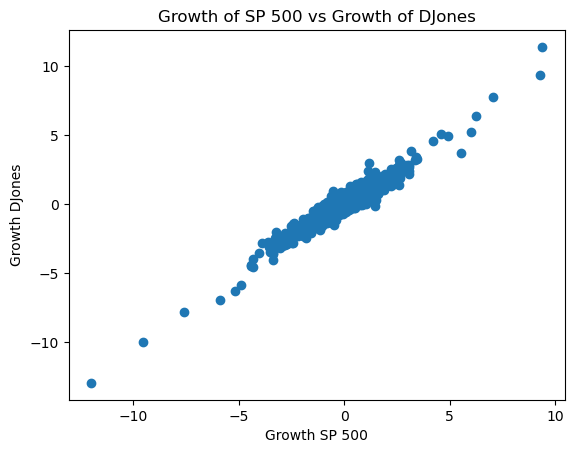

In [46]:
# Write your own code
plot_data = portfolios[["date","growth_sp500","growth_djia"]]
fig, ax = plt.subplots(1, 1)


ax.scatter(x = plot_data["growth_sp500"], y = plot_data["growth_djia"])
ax.set_xlabel("Growth SP 500")
ax.set_ylabel("Growth DJones")
ax.set_title("Growth of SP 500 vs Growth of DJones")


# <span style="color:darkblue"> III. Colors, size, and padding  </span>

<font size = "5">

Formatting axis labels


Text(0.5, 0, 'Date')

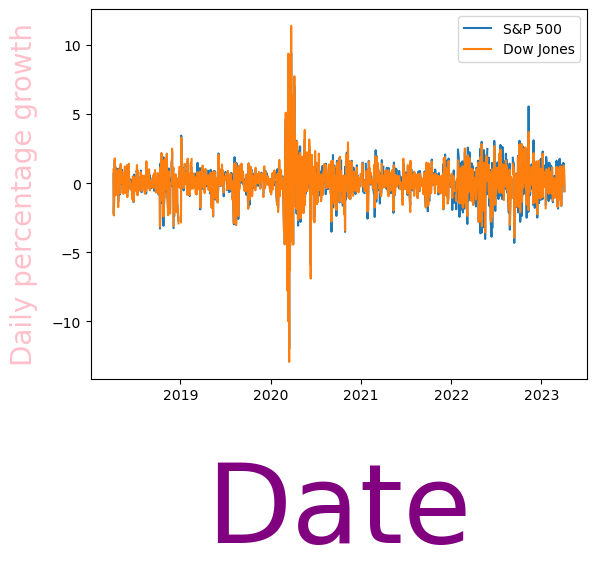

In [53]:
# Baseline plot
fig, ax = plt.subplots(1,1)
ax.plot(portfolios[["date","growth_sp500","growth_djia"]].set_index("date"))
ax.legend(["S&P 500","Dow Jones"])

# labelpad is the space between the labels and the numbers
ax.set_ylabel("Daily percentage growth",
              fontsize = 20,
              color = "pink",
              labelpad = 10)
ax.set_xlabel("Date",
              fontsize = 80,
              color = "purple",
              labelpad = 40)


<font size = "5">

Formatting ticks


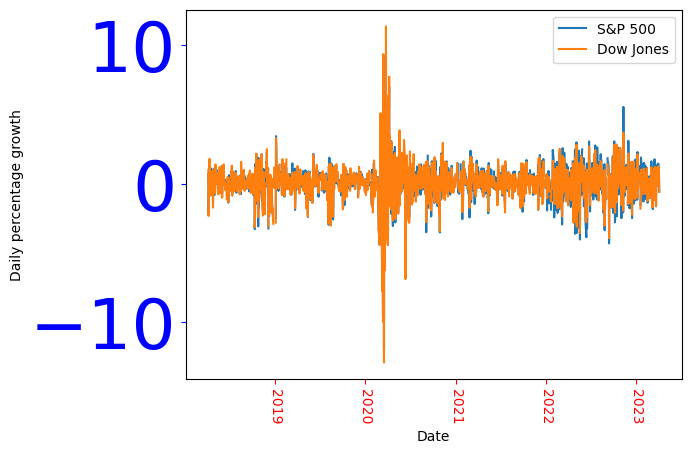

In [9]:
# Baseline plot
fig, ax = plt.subplots(1,1)
ax.plot(portfolios[["date","growth_sp500","growth_djia"]].set_index("date"))
ax.legend(["S&P 500","Dow Jones"])
ax.set_ylabel("Daily percentage growth")
ax.set_xlabel("Date")

# Change format of ticks
# Rotation is an angle from -90 to 90 degrees
ax.xaxis.set_tick_params(labelsize = 10,
                         rotation=-90,
                         colors = "red")
ax.yaxis.set_tick_params(labelsize = 50,
                         rotation=0,
                         colors = "blue")


<font size = "5">

Try it yourself!

- Copy-paste the code for the histogram above
- Change the formatting of the x-axis by <br> <br>
(a) rotating the labels by 45 degrees with <br>
```set_tick_params()```<br> <br>
 (b) increasing the padding with <br>
 ```set_xlabel(...,labelpad = 15)```

Try different values of ```labelpad```

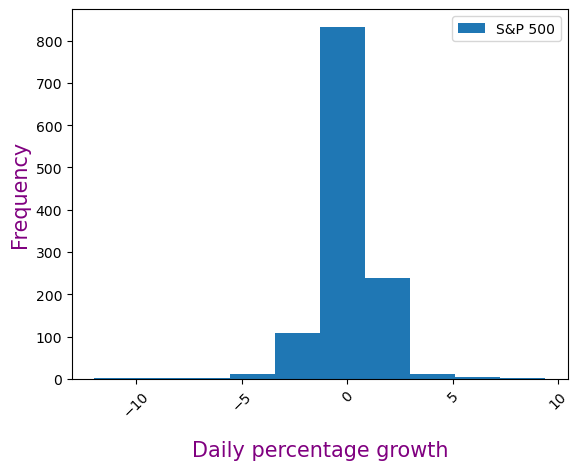

In [79]:
# Write your own code
fig, ax = plt.subplots(1, 1)
ax.hist(x = portfolios["growth_sp500"])
ax.legend(["S&P 500"])
ax.set_ylabel("Frequency", color = "purple", size = 15)
ax.set_xlabel("Daily percentage growth", labelpad = 15, color = "purple", size = 15)
ax.xaxis.set_tick_params(rotation = 45)

# <span style="color:darkblue"> IV. Tick Spacing  </span>

<font size = "5">

Formatting date axes

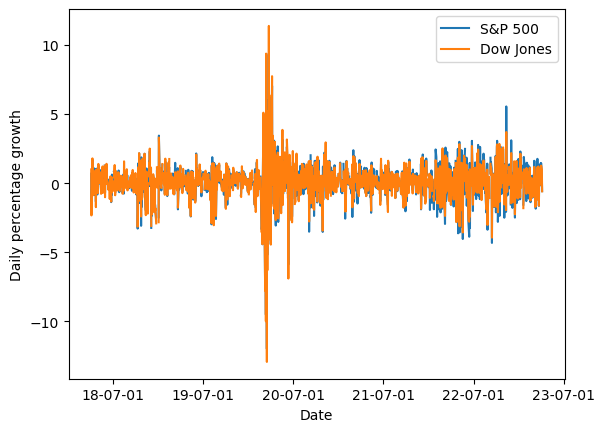

In [11]:
# Baseline plot
fig, ax = plt.subplots(1,1)
ax.plot(portfolios[["date","growth_sp500","growth_djia"]].set_index("date"))
ax.legend(["S&P 500","Dow Jones"])
ax.set_ylabel("Daily percentage growth")
ax.set_xlabel("Date")

# Establish the frequency of labels and their format
# Can also use "DayLocator","MonthLocator", "YearLocator", 
# Use wildcards to set the year format: See lecture on time data

config_ticks   = mdates.MonthLocator(interval=12)
format_ticks = mdates.DateFormatter('%y-%m-%d') 

ax.xaxis.set_major_locator(config_ticks)
ax.xaxis.set_major_formatter(format_ticks)


<font size = "5">

Formatting numeric axes

$\qquad$ <img src="figures/wildcard_floats.png" alt="drawing" width="300"/>

(-20.0, 20.0)

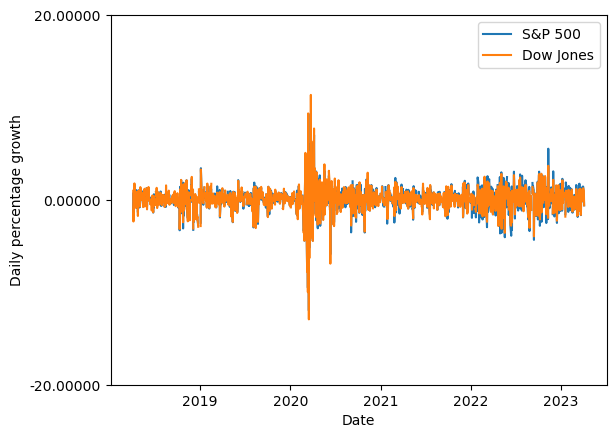

In [88]:
# Baseline plot
fig, ax = plt.subplots(1,1)
ax.plot(portfolios[["date","growth_sp500","growth_djia"]].set_index("date"))
ax.legend(["S&P 500","Dow Jones"])
ax.set_ylabel("Daily percentage growth")
ax.set_xlabel("Date")


# Set number of ticks, configure them, and display them
num_ticks = 2
num_decimal_places = 5
# M = 100
config_ticks = ticker.MaxNLocator(num_ticks)
format_ticks = ticker.FormatStrFormatter(f"%.{num_decimal_places}f")
ax.yaxis.set_major_locator(config_ticks)
ax.yaxis.set_major_formatter(format_ticks)

# num_ticks = 5
# num_decimal_places = 5
# config_ticks = ticker.MaxNLocator(num_ticks)
# format_ticks = ticker.FormatStrFormatter(f"%.{num_decimal_places}f")
# ax.yaxis.set_major_locator(config_ticks)
# ax.yaxis.set_major_locator(format_ticks)
# Set graph limits manually
ax.set_ylim(-20,20)


<font size = "5">

Try it yourself!

- Copy-paste the code for the histogram above
- Read the example in "Formatting numeric axes"
- Include 8 ticks on the x-axis, displaying 1 decimal place


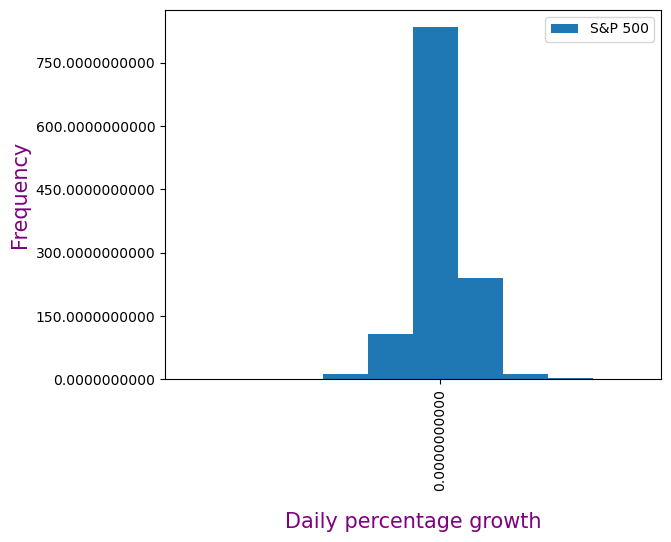

In [95]:
# Write your own code
fig, ax = plt.subplots(1, 1)
ax.hist(x = portfolios["growth_sp500"])
ax.legend(["S&P 500"])
ax.set_ylabel("Frequency", color = "purple", size = 15)
ax.set_xlabel("Daily percentage growth", labelpad = 15, color = "purple", size = 15)
ax.xaxis.set_tick_params(rotation = 90)

num_ticks = 8
config_ticks = ticker.MaxNLocator(num_ticks)
format_ticks = ticker.FormatStrFormatter(f"%.10f")
ax.xaxis.set_major_locator(config_ticks)
ax.xaxis.set_major_formatter(format_ticks)
ax.yaxis.set_major_locator(config_ticks)
ax.yaxis.set_major_formatter(format_ticks)


# <span style="color:darkblue"> V. (Optional) More resources  </span>

<font size = "5">

Anatomy of a figure

Soure + more details: https://matplotlib.org/stable/gallery/showcase/anatomy.html


<img src="figures/structure_plot.png" alt="drawing" width="550"/>

<font size = "5">

More on subplot syntax:


https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

<font size = "5">

List of colors:

https://matplotlib.org/stable/gallery/color/named_colors.html

<font size = "5">

More options

https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.05-Multi-Line-Plots/